<a href="https://www.kaggle.com/code/taylorkorte/lidar-object-classification-data-analytics-final?scriptVersionId=103388985" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lidar Object Classification

Team Fleetwood Mac: Lauren Hassi, Taylor Korte, Walker Wind

# Abstract

For this project, data from a Lidar sensor was analyzed to detect the presence of a person nearby using image classification algorithms to recognize whether a pair of legs could be seen in a two-dimensional mapping of a room. We collected and processed this data and created images by plotting the numerical output of the Lidar sensor's distance and angle measurements. These images served as inputs to the various algorithms employed in this study. The goal of this project is to create a binary classifier which sorts the images into "legs" or "no legs" classes. Furthermore, this classifier can be extended to determine the exact location of legs within a room.  Experimentation with Hough Transforms and Convolutional Neural Networks (CNNs) was performed in an attempt to create this model. Hough transforms are effective in locating lines in an input image, suitable for filtering and preprocessing the dataset employed. Multiple room configurations were tested, all containing orthogonal walls depicted as straight lines in the Lidar scans. CNNs were utilized as they are robust image classifiers, with multiple variations that can be fine-tuned to the given problem. The CNN trained for this project was highly effective at classifying plots, with a validation accuracy over 90%. Given these promising results, we believe our model can be implemented and further improved to provide assistance in navigation for an autonomous vehicle utilizing a Lidar sensor. 

# Introduction and Related Work 

## Problem Statement and Motivation

The goal of this project was to gather and classify data about objects in a room in order to control a hovercraft. Using classification algorithms, pre-trained models can assist the craft with detecting certain objects by shape. Object detection and classification can be employed to guide the vehicle in order to prevent collision. If a vehicle can recognize and locate a known object within the room, it can then calculate its own position and make a decision to move to or from the object. To narrow the project scope to fit within the project deadline, the team decided to focus on training a model to recognize a person's legs, or the absence of them from Lidar data. The idea for this project came from Walker Wind, who has been working on integrating a RPLidar Slamtec Lidar sensor into a hovercraft built for a research project. 

## Problem Scoping

At the beginning of this project our group brainstormed methods for analyzing the data from the Lidar sensor. In our initial approach to the problem, we aimed to recover a person's location within a room by determining where the pair of legs were in the image plots. We first explored methods of analyzing Lidar data based on contour analysis to filter extraneous data not related to a pair of legs. After discovering that these modifications could not accurately filter all room configurations and remove noise, the focus of the project shifted towards binary classification with convolutional neural networks. 


## Literature Review

### Hough Transforms

In researching ways to improve the efficiency and accuracy of our project's models, our group found several journal articles that used the Hough Transformation as a method for detecting lines in a Lidar plot. By defining lines in a lidar plot and removing them from the image, our images would be faster to process and likely increase the ability for a CNN to interpret images. Several journals and documentation on Hough transforms demonstrated how this algorithm functions and is implemented. 

The Lohani and Singh paper describes a useful application of Hough transforms that introduced us to the ideas of using this algorithm to detect lines. While the researchers used Hough transforms to detect 3D objects in 3D data, instead of 1D lines in 2D data, their clear documentation on the algorithms used and charts demonstrate the functionality of a Hough Transform very well. It is far more common for lidar sensors to be used in 3D applications, which requires more advanced data processing and smoothing. As a result, their research paper focuses on preprocessing and model fitting techniques that are not relevant to our project, but their success with Hough transforms encouraged us to search for a similar solution. 

The Howard and Champaigne article is most similar to our own application. They use a straight line Hough transform with a polar parameterization in order to detect the walls surrounding the Lidar sensor, and from there they are able to calculate the sensor's position. This article provides less documentation than the previous one, but has a very similar dataset to ours. Their approach is probabilistic, finding the clearest line and then searching for other lines at right angles. It appears that the researches wrote the algorthims themselves as opposed to using library, but their article does not go into detail about the implementation.

The scikit-image article is more general. It does not refer to Lidar image classification specifically, but it does detail the implementation of the transform. This article details the function and implementation of two types of straight line Hough algorithms. First, it shows a straight line Hough transform with a polar parameterization along with example Python code using the skimage libraries. The article also includes an explanation and example of a probabilistic variation of the transform, which contains parameters for searching for nearby lines. It includes Python code as well, which we used when writing our own program. 

### Convolutional Neural Networks

The work that most influenced our own neural network was a paper on Lidar data classification by Jyothish James et al. In this paper, they build a convolutional neural network to analyze Lidar images and classify the type of contamination covering the sensor. Their input data is slightly different from other models because they are identifying dirt and ice contamination, not object shapes, and they transform their images into a different form. Their neural network itself, though, was clearly applicable to our own goals. We ultimately used a structure very similar to the one outlined in this paper. The authors also found that their neural network outperforms other algorithms like k-means clustering and k-nearest neighbors, which encouraged our decision to investigate a CNN.

The James paper informed our choice of structure for the neural network, but we needed further research on the implementation. An article about binary classification with the Keras library written by Jason Brownlee provided some guidance. The Brownlee article describes each step in the implementation of a neural network, including code. However, his neural network is not a convolutional one, so its application to our own model was limited. Another article from the TensorFlow website was able to fill in the gaps. This article also describes and provides code for each step in building a neural network, but this model is convolutional. The TensorFlow CNN uses a similar structure as the James paper, and they both use accuracy as a performance metric. We adopted this approach in our own model.

The convolutional neural networks were effective for image classification, but we were also interested in a model to find the location of a certain object in an image. To do this, we researched R-CNN and bounding box regression. An article by Lilian Weng explains the uses of the various models in the R-CNN family for classification, as well as their workflows and loss functions. Another article by Adrian Rosebrock dives deeper into bounding box regression, an element of R-CNN. Rosebrock describes how bounding box regression can be used not just for classification, but to predict the location of an object within an image. This is a useful technique to increase the capabilities of a CNN and to extend our own project further.

# Data

To create our dataset we gathered Lidar data with varying room configurations and leg positions. The Lidar sensor uses a laser to find the angle and distance coordinates of objects. Originally represented in polar coordinates, the distance and angle measurements were transformed to Cartesian coordinates and plotted to map the room from the hovercraft's point of view. The Lidar sensor was placed at approximately knee height and collected a 360-degree scan of the room. The control dataset is formulated by scanning an empty room with no person's legs in view. Other objects may still reside within the scan, resulting in some noise within the images. The experimental dataset was created by gathering Lidar data in the control room, but with a person standing in range of the sensor. The person periodically changed position in the expermental trials in order to ensure diversity in the dataset. To prepare the input images for use within a model, each trial scan, consisting of at least 1500 measurements from the sensor, was saved as an individual plot using the matplotlib library. Axis labels and titles were removed to have the image only contain the measured light deflections, and further converted to grayscale to remove the RGB channel from the image. This preprocessing step is crucial when attempting to achieve a high accuracy within our model, as high-resolution images with color contain millions of data points, obscuring the relevant features and increasing the parameters within the neural network. Creating small-resolution, grayscale images allows for the model to quickly and accurately locate and classify the features of the input images.

Our final dataset includes 800 of these plots. Half of the dataset is control data with an empty room, and half is experimental data with a person's legs in view. We used an 80/20 split between training and testing. In order to crop these images for the second CNN model, openCV was utilized to take cropped images from the original dataset to create a new dataset containing 45x45 input images of only legs and random noise. 

Below is an example of our Lidar data converted into X/Y coordinates. The plot represents a room with a person standing in it, labeled "legs." See Appendix for the implementation code for collecting the data using a RPLidar Slamtec A2 Lidar sensor attached to a Raspberry Pi4.


# Model Description

Multiple methods and techniques were applied to this dataset as explorations of solutions to the project problem. The first approach was analytical, using a differentiation method. The second derivative of the data was taken in order to locate legs, as legs show up as a pair of curved lines within the data. However, this method was unreliable because it introduced too much noise, along with not accounting for curved room configurations (or circular objects). Clustering was also quickly performed on the dataset to determine if legs could be identified as an individual cluster, with varying results. Instead, our approach shifted to image analysis using the plots of Lidar data as inputs to the model.

The Hough transform, a method of finding lines in an image, was a promising exploratory technique, as it had the ability to remove the walls within a room mapping. The Hough transform uses all edges in an image as inputs to a parametric polar equation. The polar graphs are plotted on top of one another, and the points of highest accumulation represent lines in the input image. Probabilistic Hough transforms are a variation of this technique that produces more accurate results than the base transform. The probabilistic transform includes parameters for the length of lines and the amount of space between lines, and it looks for additional lines near the end of an initial target line. With this method, we were able to better isolate legs in our Lidar plots by recognizing and removing the lines representing walls. A Hough circle transform was also employed to find the curved lines representing legs. However, this attempt was not successful.

The most effective image analysis method we used was a convolutional neural network (CNN). This type of neural network is typically used for image classification because it applies filters to an image in order to reduce the image to a smaller form without losing relevant features. Our CNN alternates between convolution and pooling layers, followed by two fully-connected neural network layers. A convolution layer takes in the input image as a matrix. A smaller matrix called a kernel steps through it, covering kernel-sized subsets of the image matrix known as strides. The kernel performs a convolution, which is a matrix operation, on each stride of the image matrix. This produces a smaller convolved matrix, which extracts the important features of the image. Our first model follows the convolutional layer with a max-pooling layer. The max-pooling layer extracts the maximum value from each subset covered by the kernel. This reduces the size of the matrix even further, as well as reducing noise. The convolution and max-pooling layers repeat, and the resulting matrix is flattened and passed through two fully-connected neural network layers, which perform the classification.

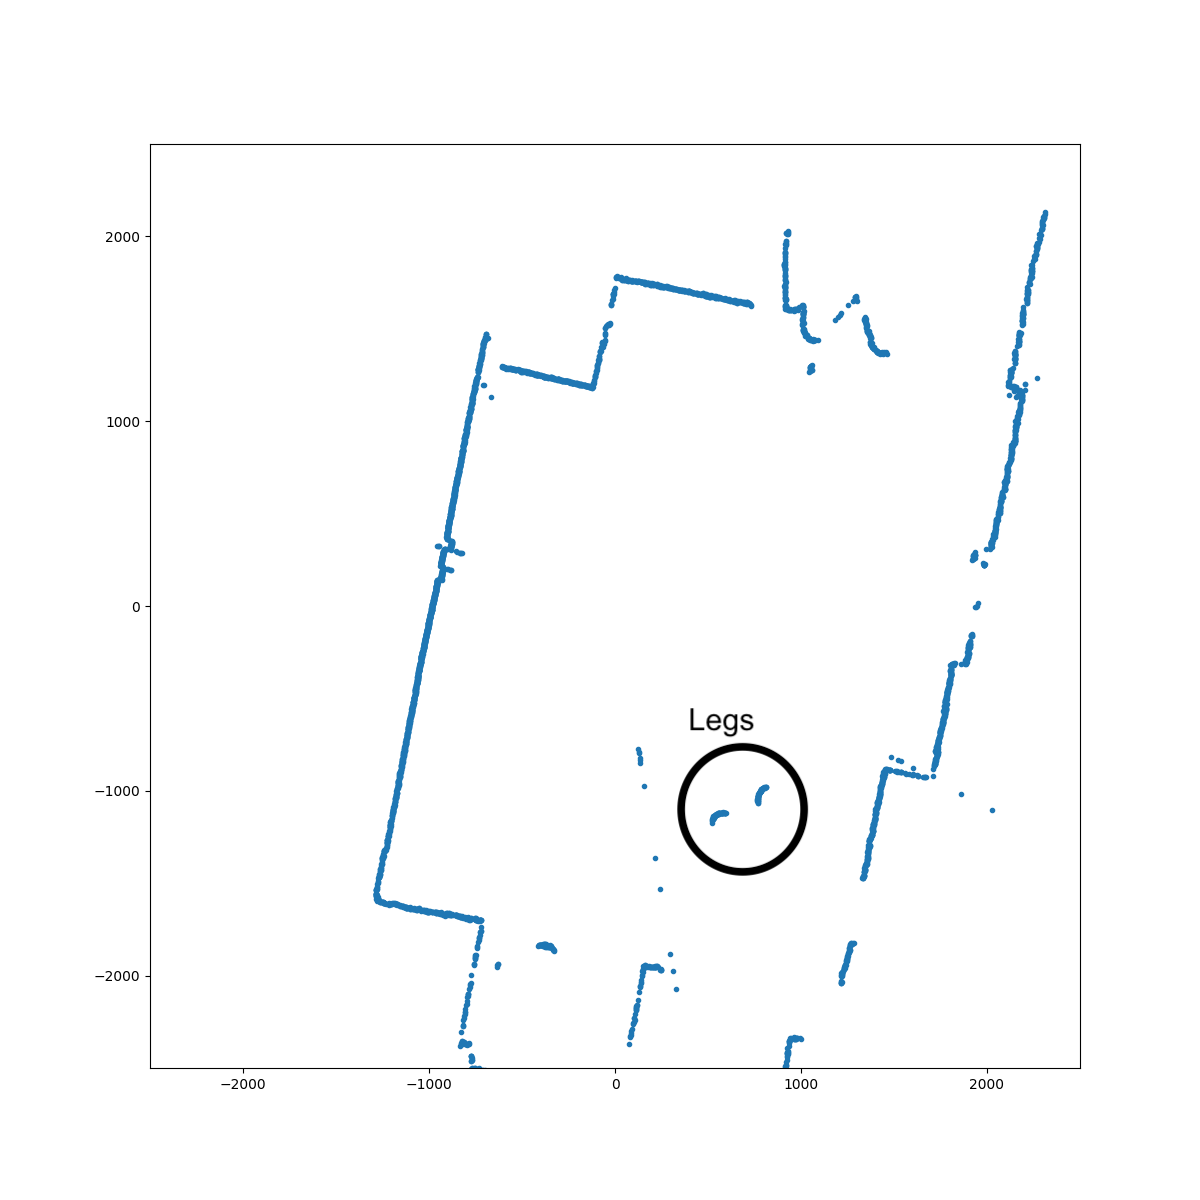

$$ Figure\,1:\,Lidar\,Data $$

# Implementation

## Initial Exploration

After collecting the data, we set out to find a way to analyze the raw data. After some preliminary results, we moved on to explore methods for reducing the images to create a more accurate model. Using Hough Transforms, we were able to get rid of many lines in the data, which can be used in the image processing to reduce unneccessary data. There were two types of Hough transforms that effectively reduced the data: a straight line transform and probablistic line transform. While the probabilistic transform was more effective at removing lines, the parameters for this type of transform were found through trial and error and would likely produce inconsistent results across the entire dataset. 

In [25]:
#Import Libraries
import os
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.axes import Axes 
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, inconsistent
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage import data, color, io, measure
from skimage.transform import hough_circle, hough_circle_peaks, probabilistic_hough_line, hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter, line
from skimage.filters import gaussian 
from skimage.util import img_as_ubyte, crop
from cv2 import imread, medianBlur, cvtColor, HoughCircles, circle, imshow, waitKey, destroyAllWindows, threshold, findContours, drawContours
from cv2 import COLOR_GRAY2BGR, HOUGH_GRADIENT, COLOR_BGR2GRAY, RETR_TREE, CHAIN_APPROX_SIMPLE, IMREAD_GRAYSCALE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras.metrics import Precision, AUC, Recall, TruePositives, FalsePositives, TrueNegatives, FalseNegatives
from random import sample

#For CNN - Loading data and setting paths for CNN
currpath = os.path.join('/kaggle', 'input', 'lidar-object-classification-dataset', 'Data')

#Paths for original plots
training_path_original = os.path.join(currpath, 'Data', 'CNNData', 'train')
testing_path_original  = os.path.join(currpath, 'Data', 'CNNData', 'test')

training_path_cropped_original = os.path.join(currpath, 'Data', 'croppedImages', 'train')
testing_path_cropped_original  = os.path.join(currpath, 'Data', 'croppedImages', 'test')

train_legs_path_original   = os.path.join(training_path_original, 'legs')
train_nolegs_path_original = os.path.join(training_path_original, 'nolegs')
test_legs_path_original    = os.path.join(testing_path_original, 'legs')
test_nolegs_path_original  = os.path.join(testing_path_original, 'nolegs')

train_legs_path_cropped_original   = os.path.join(training_path_cropped_original, 'legs')
train_nolegs_path_cropped_original = os.path.join(training_path_cropped_original, 'nolegs')
test_legs_path_cropped_original    = os.path.join(testing_path_cropped_original, 'legs')
test_nolegs_path_cropped_original  = os.path.join(testing_path_cropped_original, 'nolegs')

#Paths for greyscale plots
training_path = os.path.join(currpath, 'Data', 'GreyscaleCNN', 'train')
testing_path  = os.path.join(currpath, 'Data', 'GreyscaleCNN', 'test')

training_path_cropped = os.path.join(currpath, 'Data', 'GreyscaleCropped', 'train')
testing_path_cropped  = os.path.join(currpath, 'Data', 'GreyscaleCropped', 'test')

train_legs_path   = os.path.join(training_path, 'legs')
train_nolegs_path = os.path.join(training_path, 'nolegs')
test_legs_path    = os.path.join(testing_path, 'legs')
test_nolegs_path  = os.path.join(testing_path, 'nolegs')

train_legs_path_cropped   = os.path.join(training_path_cropped, 'legs')
train_nolegs_path_cropped = os.path.join(training_path_cropped, 'nolegs')
test_legs_path_cropped    = os.path.join(testing_path_cropped, 'legs')
test_nolegs_path_cropped  = os.path.join(testing_path_cropped, 'nolegs')


#Data for Hough Transforms and Other Dataset Exploration
image_path = os.path.join(currpath, "Data", "control", "plots")
abs_image_paths = [os.path.join(image_path, x) for x in os.listdir(image_path)]
image_labels = ["nolegs" for x in os.listdir(image_path)]

data_path = os.path.join(currpath, "Data", "control", "data")
abs_data_paths = [os.path.join(data_path, x) for x in os.listdir(data_path)]
data_labels = ["nolegs" for x in os.listdir(data_path)]

legs_image_path = os.path.join(currpath, "Data", "legs", "plots")
legs_abs_image_paths = [os.path.join(legs_image_path, x) for x in os.listdir(legs_image_path)]
legs_image_labels = ["legs" for x in os.listdir(image_path)]

legs_data_path = os.path.join(currpath, "Data", "legs", "data")
legs_abs_data_paths = [os.path.join(legs_data_path, x) for x in os.listdir(legs_data_path)]
legs_data_labels = ["legs" for x in os.listdir(legs_data_path)]



# Exploration: Clustering

To explore how well clustering could isolate the legs from the rest of the plot, we used a K-means cluster algorithm with different K values to see if there was an ideal K value that encompassed the legs. This algorithm was only used for exploration purposes because it did not consistently isolate the legs as their own cluster. If we could guarantee that the legs would be near each other and far away from every other part of the room, then this method could be better for separating the legs. 

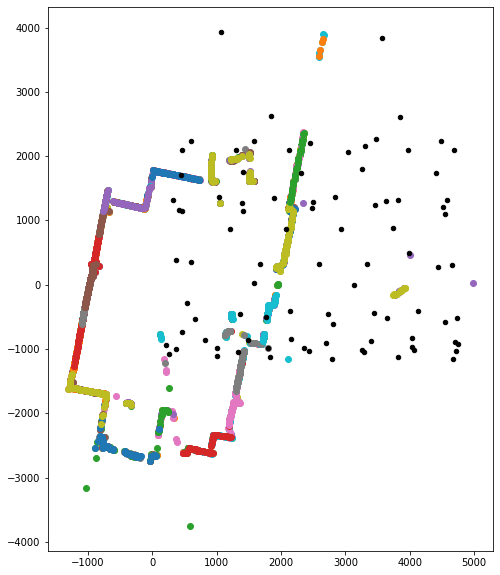

In [26]:
#Divide into training and testing sets
cmap = 'Accent'
counter = 0

# For each trial in training for legs, perform a kmeans clustering using an arbitrary k value
for trial in legs_abs_data_paths:
    data = pd.read_csv(trial)
    kmeans = KMeans(n_clusters=90, algorithm='full').fit(data)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    #print(labels)
    labelset = np.unique(labels)
    #print(labelset)
    fig = plt.figure()
    fig.set_size_inches(10,10)
    ax = fig.add_subplot(111)
    for label in labelset:
        plt.scatter(data['x'][labels == label], data['y'][labels==label],label=label)
    plt.scatter(centers[:,0],centers[:,1], s = 20, color = 'k')
    #plt.legend()
    ax.set_aspect('equal',adjustable='box')
    plt.show()
    break

# Exploration using Homemade Differentiation algorithm to detect curves

From our taking classes in differential equations and signal analysis, we have learned about the concept of finding peaks and curves in data from using derivatives. We believed it could be possible to find the legs by searching for areas of the data that have a specific set of values for second derivatives, which would describe the curves of the legs. In the end, we found that the noise in the data collection provided too much error for finite differentiation to produce clear results for a second derivative. Instead of investigating ways to reduce the noise in the signal, we decided to move on from this method and analyze images instead of the raw data.  

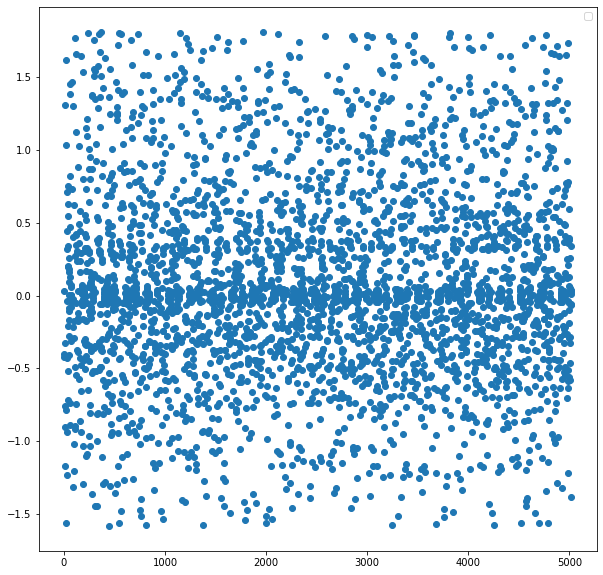

In [27]:
# Find the second derivative d^2y/dx^2 of the points 
cmap = 'Accent'
counter = 0
# For each trial in training for legs, find the second deriviative using numpy's gradient function

data = pd.read_csv(legs_abs_data_paths[0])
y = data['y']
x = data['x']
dydx = np.gradient(y)/np.gradient(x)
dy2dx2 = np.gradient(dydx)
a = data.index
dydx = dy2dx2

#filter out extremes
dydx = pd.Series(dydx)
filterindex = dydx.between(dydx.quantile(.15), dydx.quantile(.85)) # without outliers
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(111)

plt.scatter(a[filterindex],dydx[filterindex])
plt.legend()

plt.show()

#Points should be repeated, eliminate duplicate areas by segmented by each revolution, averaging points (optional)

# Exploration: Hough Transforms to Reduce Images

The following code demonstrates the use of several different Hough Transform models on a sample image, with reasonable success. By using the Hough Transform to predict where lines are, we can reduce the image by covering up any lines. We tested the Hough Transform library from skimage on a sample image in three different ways. First, we are using a simple straight line Hough transform to find lines in the image. Next, we use a Probabilistic Hough Transform which contains more specific parameters than a normal Hough Transform. This model seemed to perform slightly better than simpler straight line model, though we could not find a way of easily measuring the accuracy. Finally, to see if the legs could be detected as circles, we use a Hough Circle transform and found that the legs did not have a shape profile that matched the circle transform. 

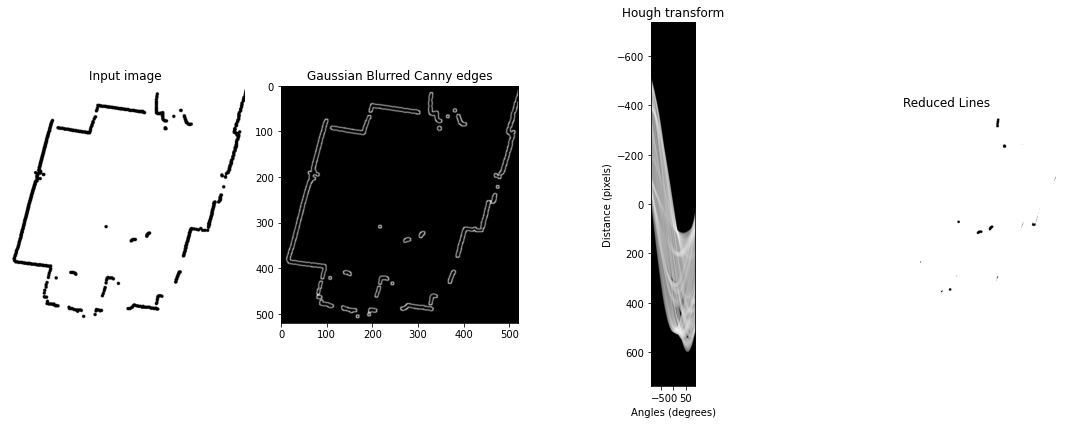

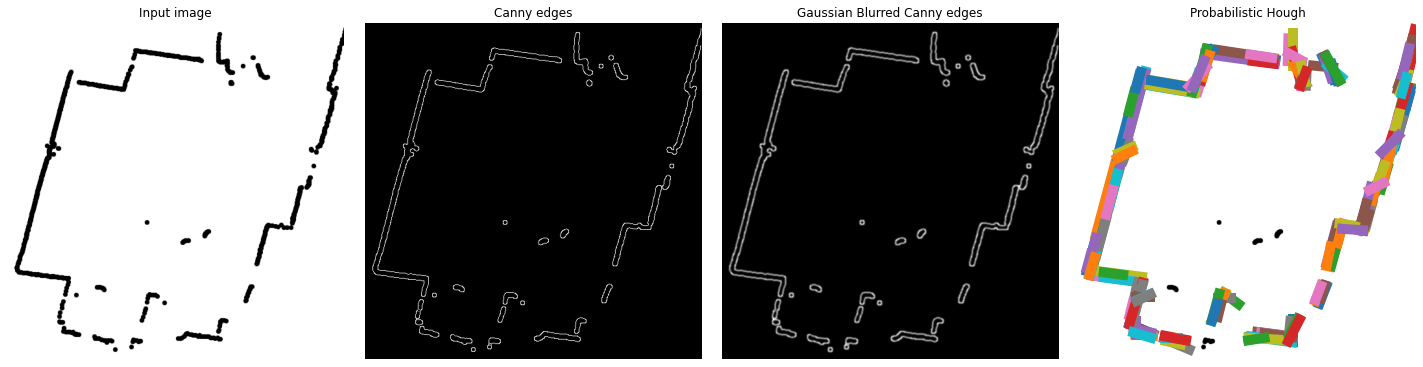

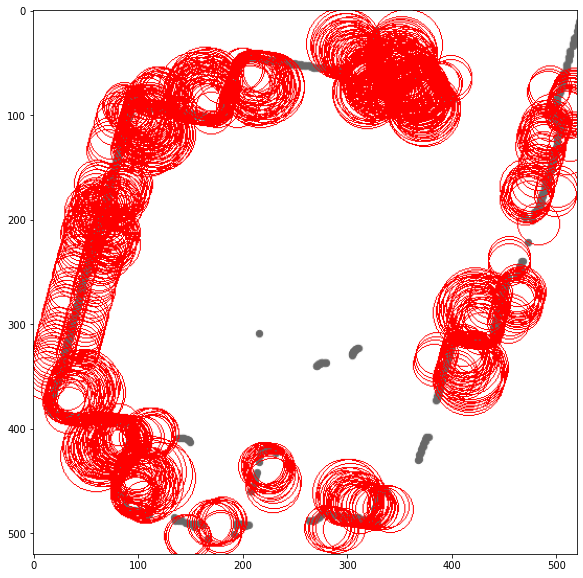

In [28]:
# Constructing test image
im = io.imread("/kaggle/input/lidar-object-classification-dataset/sample.png")
image = img_as_ubyte(im)
image_gray = color.rgb2gray(color.rgba2rgb(image))

image_gray = crop(image_gray,((100,100),(100,100)),copy = False)
image_1 = image_gray
#Use Canny edge detection to find edges in the image to perform the Hough Transform on
edges = canny(image_1, sigma=1)

edges_blurred = gaussian(edges,sigma=1)

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(edges_blurred, theta = tested_angles)

# Generating figure 1
fig, axes = plt.subplots(1, 4, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image_gray, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges_blurred, cmap=cm.gray)
ax[1].set_title('Gaussian Blurred Canny edges')

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[2].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[2].set_title('Hough transform')
ax[2].set_xlabel('Angles (degrees)')
ax[2].set_ylabel('Distance (pixels)')
ax[2].axis('image')

ax[3].imshow(image_gray, cmap=cm.gray)
ax[3].set_ylim((image_gray.shape[0], 0))
ax[3].set_axis_off()
ax[3].set_title('Reduced Lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[3] = plt.axline((x0, y0), slope=np.tan(angle + np.pi/2), color = "w",linewidth = 8) #white out lines

plt.tight_layout()
plt.show()

### Probabilistic Lines

#using parameters that work
lines = probabilistic_hough_line(edges, threshold=10, line_length=20,
                                 line_gap=15)
# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_gray, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges_blurred, cmap=cm.gray)
ax[2].set_title('Gaussian Blurred Canny edges')

ax[3].imshow(image_1, cmap = cm.gray)
for line in lines:
    p0, p1 = line
    ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]), linewidth = 10)
ax[3].set_xlim((0, image_1.shape[1]))
ax[3].set_ylim((image_1.shape[0], 0))
ax[3].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()

### Hough circles

# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges_blurred, hough_radii)

# Select the most prominent 2 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=1050)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
image_1 = color.gray2rgb(image_1)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image_1.shape)
    image_1[circy, circx] = (250, 0, 0)

ax.imshow(image_1, cmap=plt.cm.gray)
plt.show()


# Exploration: CNN

## Convolutional Neural Network


## Model 1

For this model, we calculated image weight values as the product of image width, height, and number of color channels. The normalized image resolution was 496 by 369 with only the alpha channel, resulting in a normalized 173,061 number of weights per image. We used 30 epochs with 8 steps per epoch and determined the batch size based on equation 1. To choose the number of epochs, we ran the model with an increasing number of epochs until the accuracy flattened, while varying the learning rate of our optimizer to fine-tune this decision. The accuracy of the model shows how well the model can predict based on the training dataset whereas the validation accuracy shows how well the model can evaluate and predict the testing dataset based on its trained weights. We used validation accuracy, a confusion matrix, precision and recall as our performance metrics because we found that these metrics were most commonly used when evaluating convolutional neural networks. We used an 80/20 split when dividing our training and testing data. That means that this model trains using 320 greyscale images of a room with legs and 320 greyscale images of a room without legs. It tests on 80 greyscale images of a room with legs and 80 greyscale images of a room without legs. Example images are shown below for legs and no legs.  


Equation 1: $$ \frac{Number\,of\,Datapoints}{Batches} = Steps $$

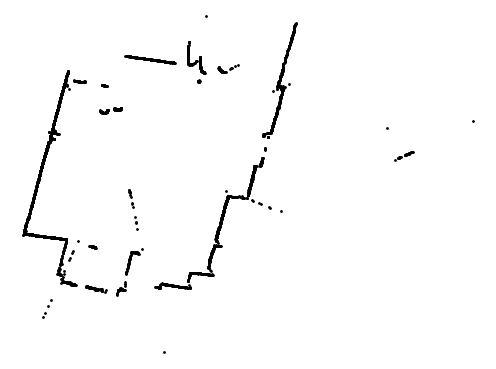

*Figure 2: Legs*

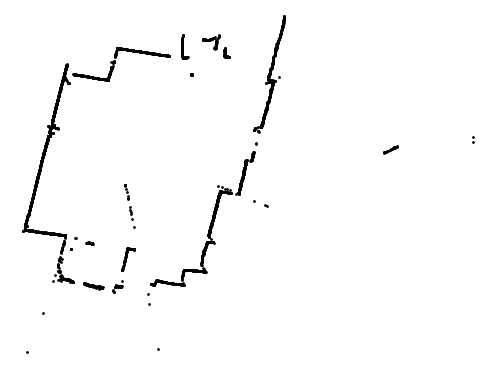

*Figure 3: No Legs*

In [29]:
#Create Convolutional Base

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(496,369,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add dense layers on top
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

# Add sigmoid activation function in order to determine the correct classification of legs or no legs, 
# similar to a 2-element softmax activation function used to assume one element is zero 
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

2022-08-15 22:54:38.957725: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 494, 367, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 247, 183, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 245, 181, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 90, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 88, 64)       36928     
_________________________________________________________________
flatten (Flatten)            (None, 675840)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

Fitting this model on the full dataset of legs and no legs (includes room)

In [ ]:
#Compile and train - takes awhile to run
opt = Adam(learning_rate=1e-5)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', Precision(), AUC(), 
                                                                  Recall(), TrueNegatives(), FalseNegatives(), 
                                                                  TruePositives(),  FalsePositives()])

datagen = ImageDataGenerator()

train_data_ = datagen.flow_from_directory(training_path, class_mode='binary', 
                                          target_size=(496, 369), color_mode='grayscale', batch_size=20)

test_data_ = datagen.flow_from_directory(testing_path, class_mode='binary', 
                                         target_size=(496, 369), color_mode='grayscale', batch_size=20)

history = model.fit(train_data_, epochs=30, steps_per_epoch=8, validation_data=test_data_, )


Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


2022-08-15 22:54:40.062689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
8/8 [==============================] - 28s 3s/step - loss: 29.4663 - accuracy: 0.5500 - precision: 0.5586 - auc: 0.5313 - recall: 0.7294 - true_negatives: 26.0000 - false_negatives: 23.0000 - true_positives: 62.0000 - false_positives: 49.0000 - val_loss: 3.4001 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_auc: 0.5063 - val_recall: 1.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_true_positives: 80.0000 - val_false_positives: 80.0000
Epoch 2/30
8/8 [==============================] - 23s 3s/step - loss: 7.1366 - accuracy: 0.4812 - precision: 0.5106 - auc: 0.4799 - recall: 0.2857 - true_negatives: 53.0000 - false_negatives: 60.0000 - true_positives: 24.0000 - false_positives: 23.0000 - val_loss: 6.0087 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_auc: 0.5000 - val_recall: 1.0000 - val_true_negatives: 0.0000e+00 - val_false_negatives: 0.0000e+00 - val_true_positives: 80.0000 - val_false_positives: 80.0000
Epoch 3/30
8/8 [===========

In [ ]:
#Evaluate Model

#Accuracy vs Epoch plot
print(f"The final validation accuracy is {history.history['val_accuracy'][-1]}")

ac = plt.figure(1)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy vs Epoch for Model 1')

ac.show()

#Confusion Matrix
cm = plt.figure(2)

test_all = model.evaluate(test_data_, verbose=2)

#print(test_all)
print(f"The final recall rate is {test_all[4]}")
print(f"The final precision is {test_all[2]}")

truePos  = test_all[7]
falsePos = test_all[8]
trueNeg  = test_all[5]
falseNeg = test_all[6]

confusion_matrix = [[trueNeg, falsePos], [falseNeg, truePos]]
confusion_matrix = np.asarray(confusion_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

cm.show()

## Model 2

In order to validate our initial model we created another CNN (model 2) that uses cropped greyscale images of only legs and images of noise to classify data (see images below). We also used a slightly smaller training nolegs dataset. The original goal was to find the exact location of the legs by combining this model with region of interest (ROI) for object detection. This technique is also known as R-CNN and it uses a "sliding window" to find the location of an object in an image. 

This model has a similar structure to the original model but the images have a smaller shape (45x45) and therefore smaller weight value (2,025). We based our model on a similar CNN model constructed by Sagi Eppel. We added a Dropout layer to this model to prevent overfitting and added some Gaussian noise to soften the images. This model also uses stochastic gradient descent (SGD) as the optimizer rather than Adam. For this model we used 1000 epochs and 16 steps per epoch. We also used the same performance metrics from model 1. 

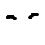

*Figure 4: Cropped Legs*

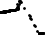

*Figure 5: Cropped No Legs*

In [ ]:
#Runs much faster than the original dataset but more epochs

#Create Convolutional Base
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45,45,1)))
model2.add(layers.Dropout(.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.Dropout(.1))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Add dense layers on top
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dropout(.5))
model2.add(layers.GaussianNoise(.05))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(32, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

#Compile and train
lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=10000,
    decay_rate=0.95)

optimizer = SGD(learning_rate=lr_schedule)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), AUC(), 
                                                                         Recall(), TrueNegatives(), FalseNegatives(), 
                                                                         TruePositives(),  FalsePositives()])
datagen = ImageDataGenerator()

train_output_dir = os.path.join(currpath, 'Data', 'flow_output', 'train')
test_output_dir  = os.path.join(currpath, 'Data', 'flow_output', 'test')

train_data_cropped_ = datagen.flow_from_directory(training_path_cropped, 
                                                  class_mode='binary', 
                                                  shuffle=True, 
                                                  target_size=(45, 45), 
                                                  color_mode='grayscale', 
                                                  batch_size=20,

test_data_cropped_ = datagen.flow_from_directory(testing_path_cropped, 
                                                 class_mode='binary', 
                                                 shuffle=True, 
                                                 target_size=(45, 45), 
                                                 color_mode='grayscale', 
                                                 batch_size=20,


history2 = model2.fit(train_data_cropped_, epochs=1000, steps_per_epoch=16, validation_data=test_data_cropped_)

In [ ]:
#Evaluating the Second Model

#Accuracy vs Epoch Plot
print(f"The final validation accuracy is {history2.history['val_accuracy'][-1]}")

ac2 = plt.figure(1)

plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy vs Epoch for Model 2')

ac2.show()

#Confusion Matrix
cm2 = plt.figure(2)

test_all2 = model2.evaluate(test_data_cropped_, verbose=2)

print(f"The final recall rate is {test_all2[4]}")
print(f"The final precision is {test_all2[2]}")

truePos2  = test_all2[7]
falsePos2 = test_all2[8]
trueNeg2  = test_all2[5]
falseNeg2 = test_all2[6]

confusion_matrix2 = [[trueNeg2, falsePos2], [falseNeg2, truePos2]]
confusion_matrix2 = np.asarray(confusion_matrix2)
print(confusion_matrix2)

group_names2 = ['True Neg','False Pos','False Neg','True Pos']
group_counts2 = ["{0:0.0f}".format(value) for value in confusion_matrix2.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in confusion_matrix2.flatten()/np.sum(confusion_matrix2)]
labels2 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names2,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)

sns.heatmap(confusion_matrix2, annot=labels2, fmt='', cmap='Blues')

cm2.show()

# Experimental Results
## Model 1

The final accuracy for the first model was 100% and the final validation accuracy was 92.5%. Figure 6 shows how the accuracies changed for each epoch. A 92.5% validation accuracy means that our model has significant predictive capabilities. We believe that this accuracy could be increased by further expanding our dataset. 

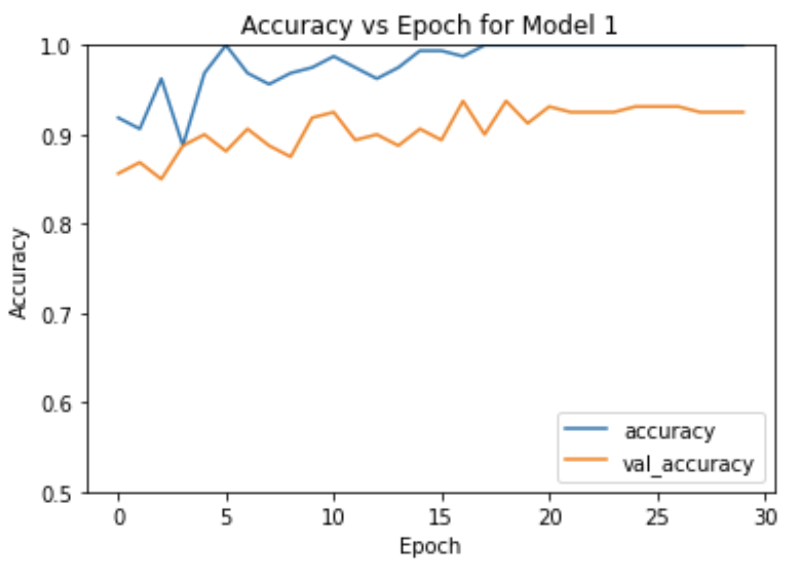

$$ Figure\,6:\,Accuracy\,vs.\,Epoch\,for\,Model\,1 $$


The confusion matrix below shows the amount of true positive, true negative, false positive, and false negative results from the testing the model. Ideally, all of the results would be either true positive or true negative, as the false positive and negative results show where the model failed to classify the image correctly. In addition, the recall rate for this model is 95% and the precision in 90.5%. The recall rate conveys the model's ability to find all relevant instances in a dataset while precision conveys how well the model can find the relevant data points. A good model can balance these two metrics and our model has relatively high values for precision and recall. These results further validate our model's predictive power but show that there is some room for improvement.

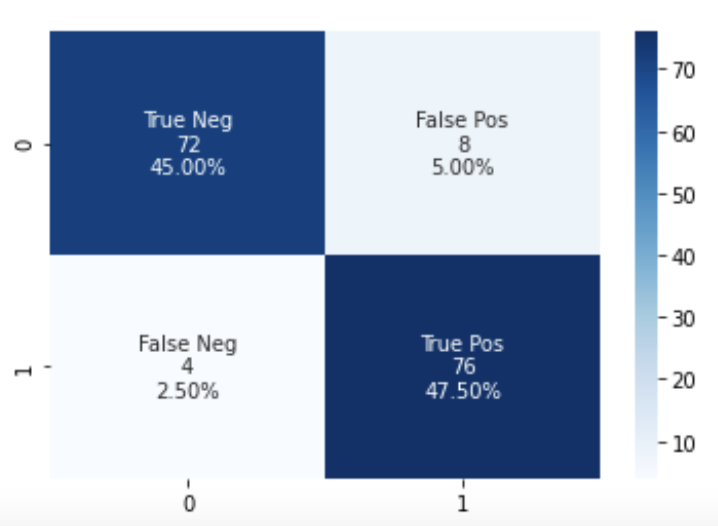

$$ Figure\,7:\,Confusion\,Matrix\,for\,Model\,1 $$


## Model 2

The final accuracy for the second model was 98.4% and the validation accuracy was 84.4%. These values are relatively high but slightly lower than the results from model 1. This was surprising as we expected a higher accuracy for this model. We believe that the lower accuracy is a result of using a slightly smaller training dataset for this model and that expanding the dataset will increase the validation accuracy.

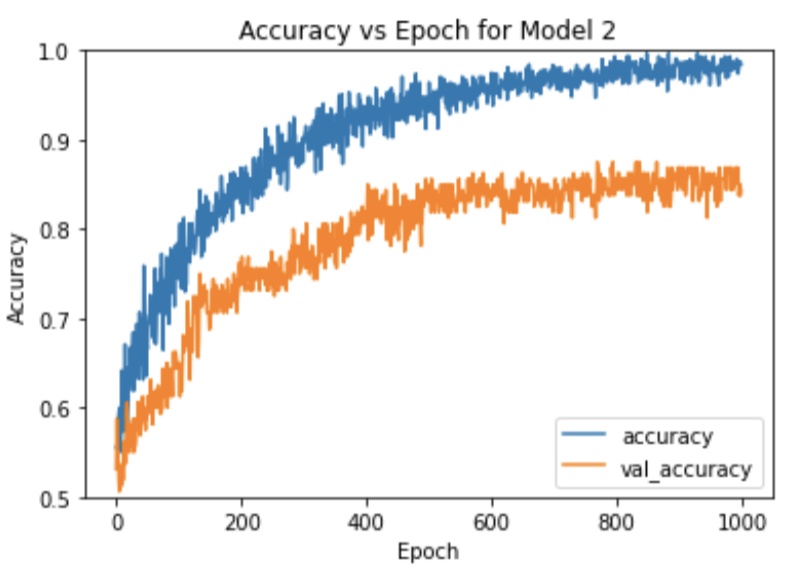
$$ Figure\,8:\,Accuracy\,vs.\,Epoch\,for\,Model\,2 $$

We also created a confusion matrix for this model (Figure 9) and calculated a recall rate of 73.75% and a precision of 93.7%. These values are also slightly lower than the initial model and the recall rate is lower than expected. Given more time we would change some of the model parameters in order to better balance the precision and recall. In addition, The amount of true negatives and true positives are slightly lower than the values from Model 1 but are still relatively high compared the the amount of false negatives and false positives. We belive that adding more data points could further improve this model and that this model would work to find the leg location when combined with ROI. 

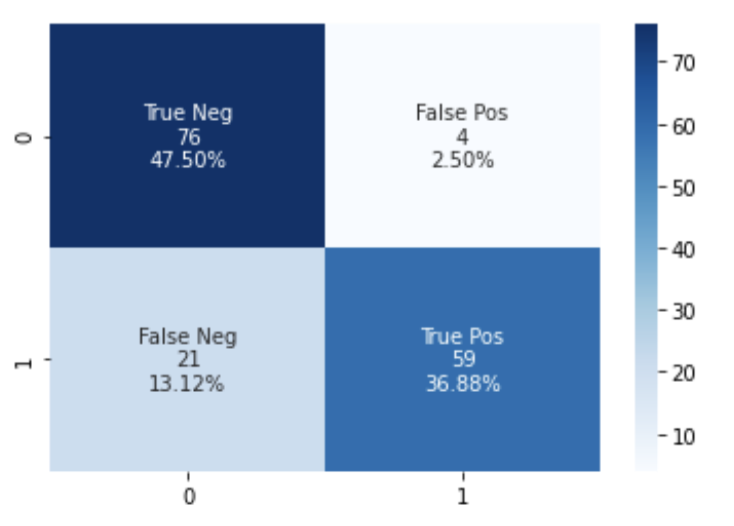
$$ Figure\,9:\,Confusion\,Matrix\,for\,Model\,2 $$

# Conclusion

Overall, we are satisfied with the quality of results that we were able to collect from the CNN classification models and believe that we have created relatively accurate models for classifying legs. This project was certainly a learning experience for us, as we attempted to apply the skills that we learned in ML algorithms, Pandas, and troubleshotting code to a problem that related back to our experience in Mechanical Engineering. After brainstorming about different ways we could analyze Lidar data, we had the opportunity to collect our own data from different rooms on Tufts campus using an advanced, expensive Lidar sensor. While our efforts to explore the dataset were only slightly integrated with our final models, the process of using derivatives and Hough transforms to find the location of legs in a Lidar plot proved to give us a better understanding of the dataset, adjust the scope of our problem, and inform our decision to use a binary classification CNN model. Training and writing the code to make our own CNN model was another new experience for us and demonstrated how effective CNN models can be for classifying images. 

In the future, we would like to continue working on the classification model to find the specific location of legs (R-CNN Bounding box). If we had more time, we would also have liked to improve the Hough transform image reduction and integrate that into our image processing for training the models. While performing additonal image processing could increase the time it takes the model to make predictions, we believe that reducing our images could produce higher model accuracy. With specific information about the location of a feature, we could provide significant information to the control algorithm of the hovercraft. Ideally, we would be able to generate results while the hovercraft was runnning instead of in post, as we have been doing. Overall, we are excited to apply the skills learned from this project to other areas of research and look forward to integrating our models with the operation of Walker's hovercraft. 


# Contributions

Lauren assisted with data acquisition and wrote much of the report.

Taylor created and evaluated the CNN models and organized and edited the report.

Walker performed initial dataset analysis and created additional datasets. 

# References

Brownlee, Jason. "Binary Classification Tutorial with the Keras Deep Learning Library." *Machine Learning Mastery*, 27 Aug 2020, https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/. Accessed 12 May 2021.

"Convolutional Neural Network (CNN)." *TensorFlow*, https://www.tensorflow.org/tutorials/images/cnn. Accessed 12 May 2021.

Howard, Matthew and Chris Champaigne. "Processing LIDAR data using a Hough transform." *Project Winwood*, 27 Apr 2017, http://winwood.matt.how/2015/04/27/processing-lidar.html. Accessed 12 May 2021.

James, Jyothish et al. "Classification of LIDAR Sensor Contaminations with Deep Neural Networks." *CSCS 2018*, 13-14 Sep 2018, https://cscs.mpi-inf.mpg.de/files/2018/09/09-Classification-of-LIDAR-Sensor-Contaminations-with-Deep-Neural-Networks.pdf. Accessed 12 May 2021.

Kim, Hyunyoung et al. "Design and Implementation of Mobile Indoor Scanning System." *2019 International Conference on Wireless and Mobile Computing, Networking and Communications (WiMob)*, 2019, pp. 1-5, doi: 10.1109/WiMOB.2019.8923287, https://ieeexplore.ieee.org/abstract/document/8923287. Accessed 12 May 2021.

Lohani, Bharat and Rajneesh Singh. "Development of a hough transform based algorithm for extraction of buildings from actual and simulated LiDAR data." *Department of Civil Engineering, Indian Institute of Technology Kanpur*, https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.595.795&rep=rep1&type=pdf. Accessed 12 May 2021.

Pavlov, Artyom. "RPLidar." *GitHub*, 9 Apr 2019, https://github.com/SkoltechRobotics/rplidar. Accessed 12 May 2021.

Rosebrock, Adrian. "Object detection: Bounding box regression with Keras, TensorFlow, and Deep Learning." *PyImageSearch*, 5 Oct 2020, https://www.pyimagesearch.com/2020/10/05/object-detection-bounding-box-regression-with-keras-tensorflow-and-deep-learning/. Accessed 12 May 2021.

"RPLidar A2." *Shanghai Slamtec Co.*, https://www.slamtec.com/en/Lidar/A2. Accessed 12 May 2021.

"Straight line Hough transform." *scikit-image*, https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html. Accessed 12 May 2021.

Eppel, Sagi. “Setting an Attention Region for Convolutional Neural Networks Using Region Selective Features, for Recognition of Materials within Glass Vessels.” *ArXiv*, 2017, arxiv.org/pdf/1708.08711.pdf. Accessed 13 May 2021.

Weng, Lilian. "Object Detection for Dummies Part 3: R-CNN Family." *Lil'Log*, 31 Dec 2017, https://lilianweng.github.io/lil-log/2017/12/31/object-recognition-for-dummies-part-3.html#faster-r-cnn. Accessed 12 May 2021.